In [176]:
import pandas as pd

In [177]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train

,ProfilePic,UsernameLength,FullnameWords,FullnameLength,name==username,DescriptionLength,private,posts,followers,follows,fake
0,1,0.27,0,0.00,0,53,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,679,414,651,0
4,1,0.00,2,0.00,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,57,73,1


In [178]:
df = pd.concat([df_train, df_test], ignore_index=True)


# Cleaning

In [179]:
df.isnull().sum()

ProfilePic           0
UsernameLength       0
FullnameWords        0
FullnameLength       0
name==username       0
DescriptionLength    0
private              0
posts                0
followers            0
follows              0
fake                 0
dtype: int64

In [180]:
df

,ProfilePic,UsernameLength,FullnameWords,FullnameLength,name==username,DescriptionLength,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,679,414,651,0
4,1,0.00,2,0.0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...
691,1,0.29,1,0.0,0,0,0,13,114,811,1
692,1,0.40,1,0.0,0,0,0,4,150,164,1
693,1,0.00,2,0.0,0,0,0,3,833,3572,1
694,0,0.17,1,0.0,0,0,0,1,219,1695,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProfilePic         696 non-null    int64  
 1   UsernameLength     696 non-null    float64
 2   FullnameWords      696 non-null    int64  
 3   FullnameLength     696 non-null    float64
 4   name==username     696 non-null    int64  
 5   DescriptionLength  696 non-null    int64  
 6   private            696 non-null    int64  
 7   posts              696 non-null    int64  
 8   followers          696 non-null    int64  
 9   follows            696 non-null    int64  
 10  fake               696 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 59.9 KB


In [182]:
print(df.duplicated().sum())
df_train.drop_duplicates()


4


,ProfilePic,UsernameLength,FullnameWords,FullnameLength,name==username,DescriptionLength,private,posts,followers,follows,fake
0,1,0.27,0,0.00,0,53,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,679,414,651,0
4,1,0.00,2,0.00,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,57,73,1


In [183]:
def count_outliers(df, multiplier=1.5):
    numeric_cols = df.select_dtypes(include='number').columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    
    outlier_counts = ((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).sum()
    return outlier_counts


In [184]:
count_outliers(df)

ProfilePic            0
UsernameLength       15
FullnameWords        20
FullnameLength       74
name==username       25
DescriptionLength    62
private               0
posts                96
followers            91
follows              52
fake                  0
dtype: int64

In [185]:
def outlier_count_for_fake(df, target_col='fake', multiplier=1.5):
    numeric_cols = df.select_dtypes(include='number').columns.drop(target_col)
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    
    outlier_mask = (df[numeric_cols] < lower) | (df[numeric_cols] > upper)
    
    outlier_counts = outlier_mask.sum(axis=1)
    
    # Filter only rows where target == 1
    fake_rows = outlier_counts[df[target_col] == 1]
    
    # Counts
    counts = fake_rows.value_counts().sort_index()
    
    # Percentages
    percentages = (counts / counts.sum() * 100).round(2)
    
    # Combine into one DataFrame
    summary = pd.DataFrame({
        "count": counts,
        "percentage": percentages
    })
    
    return summary
outlier_count_for_fake(df)

,count,percentage
0,241,69.25
1,73,20.98
2,31,8.91
3,2,0.57
4,1,0.29


#   EDA

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProfilePic         696 non-null    int64  
 1   UsernameLength     696 non-null    float64
 2   FullnameWords      696 non-null    int64  
 3   FullnameLength     696 non-null    float64
 4   name==username     696 non-null    int64  
 5   DescriptionLength  696 non-null    int64  
 6   private            696 non-null    int64  
 7   posts              696 non-null    int64  
 8   followers          696 non-null    int64  
 9   follows            696 non-null    int64  
 10  fake               696 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 59.9 KB


C:\Users\anuva\AppData\Local\Temp\ipykernel_26688\2244091291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=df, palette='Set2')


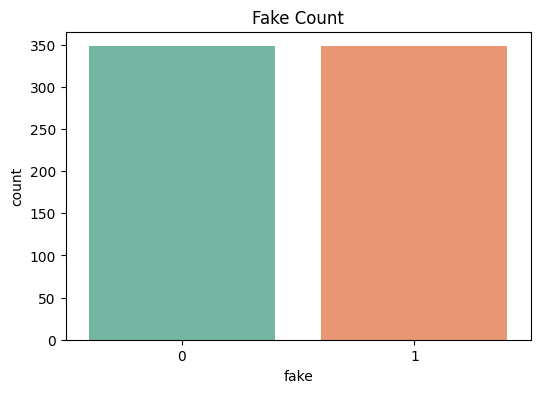

In [188]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fake', data=df, palette='Set2')
plt.title('Fake Count')
plt.show()

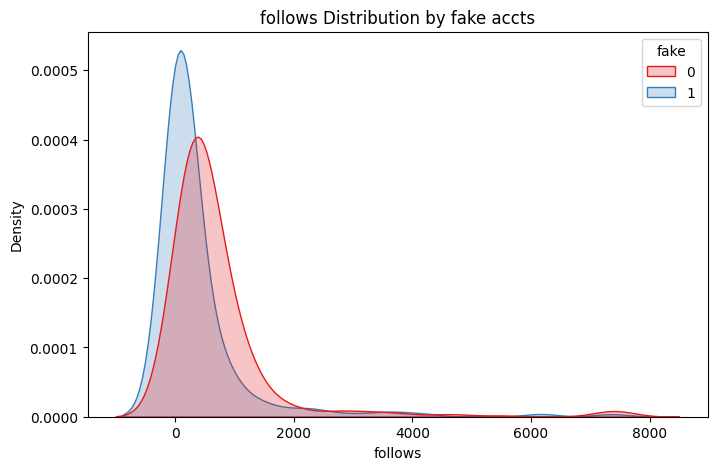

In [189]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="follows", hue="fake", fill=True, palette="Set1")
plt.title("follows Distribution by fake accts")
plt.show()


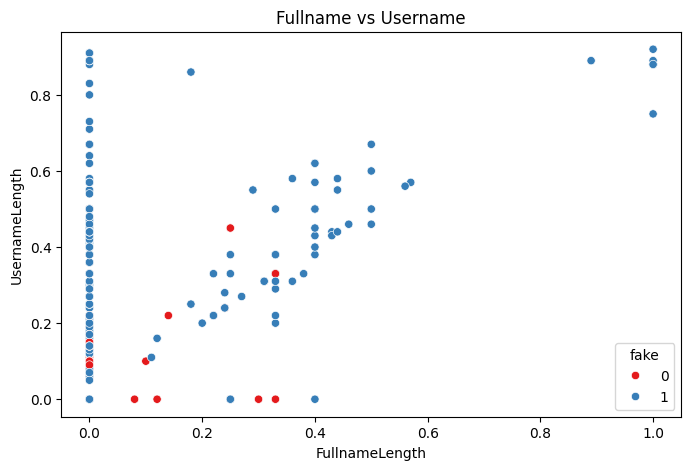

In [190]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="FullnameLength",y="UsernameLength", hue="fake", palette="Set1")
plt.title("Fullname vs Username")
plt.show()


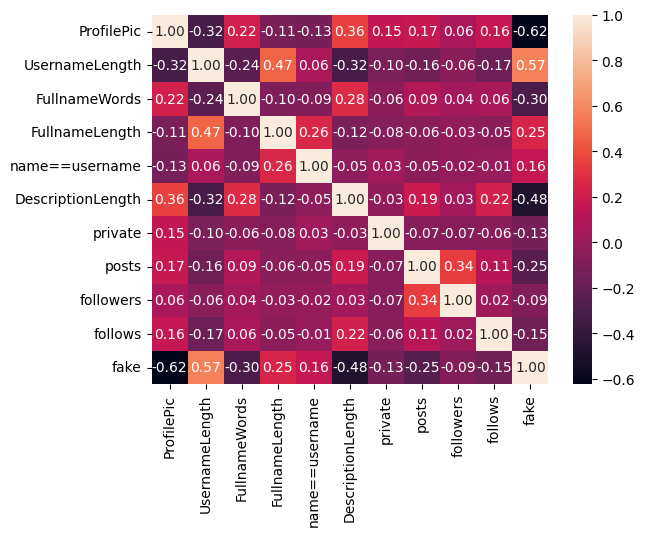

In [191]:
sns.heatmap(data=df.corr(),fmt=".2f",annot=True)
plt.show()

In [192]:
corr=df.corr(numeric_only=True)
target = 'fake'
correlations = corr[target].drop(target).abs().sort_values(ascending=False)
top_features = correlations.head(3).index  # Top 3 most correlated features

print("Top correlated features with target:", top_features.tolist())

Top correlated features with target: ['ProfilePic', 'UsernameLength', 'DescriptionLength']


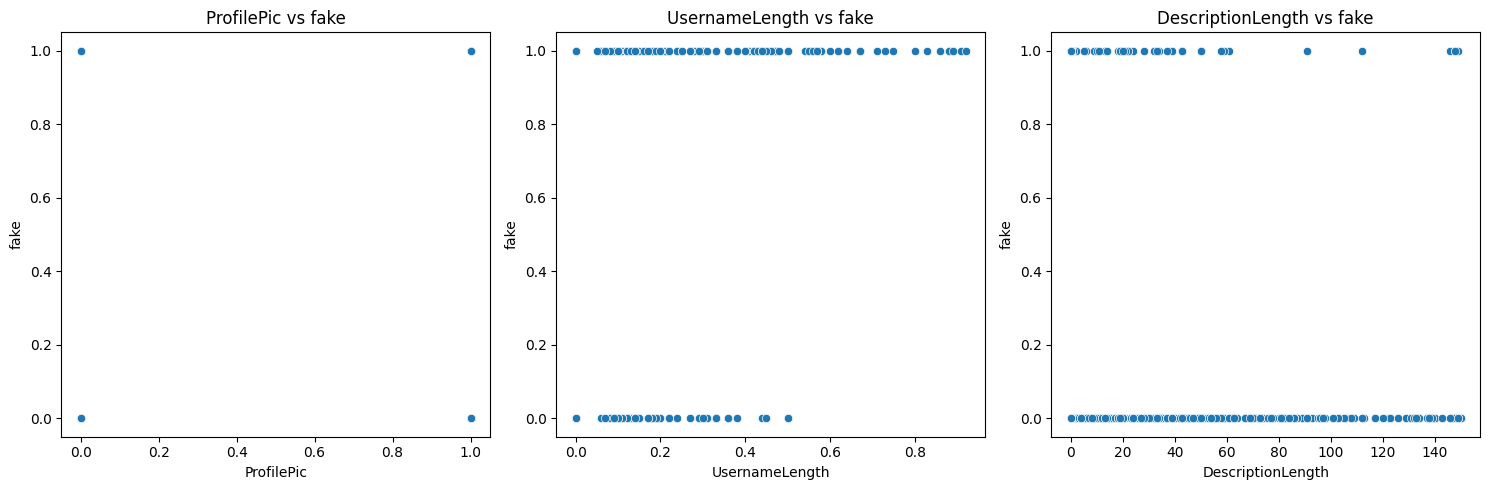

In [193]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()

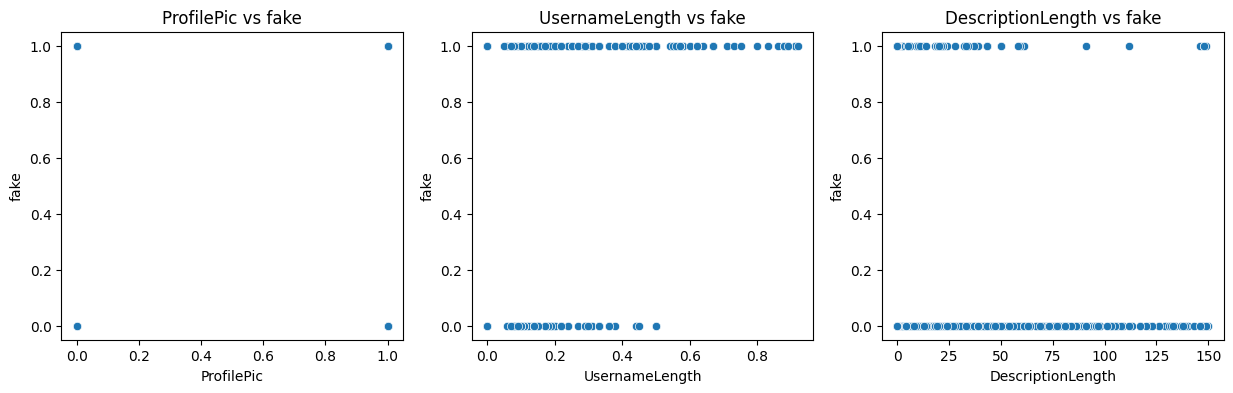

In [194]:
target_corr = corr["fake"].drop("fake").abs().sort_values(ascending=False)

# pick top 3 features most correlated with target
top_features = target_corr.head(3).index

# scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y="fake", ax=axes[i])
    axes[i].set_title(f"{feature} vs fake")
plt.show()

In [195]:
df=df.drop(["follows","followers"],axis=1)

# Modeling

In [196]:
from sklearn.preprocessing import RobustScaler
def rs(X):
    cols = X.select_dtypes(include='number').columns
    rs = RobustScaler()
    X[cols] = rs.fit_transform(X[cols])
    return X


In [197]:
X=rs(df.drop("fake",axis=1))
y=df["fake"]

## Logistic Regression

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [199]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [200]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [201]:
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8928571428571429

Confusion Matrix:
 [[67  3]
 [12 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        70
           1       0.95      0.83      0.89        70

    accuracy                           0.89       140
   macro avg       0.90      0.89      0.89       140
weighted avg       0.90      0.89      0.89       140



## Random Forrest

In [202]:
from sklearn.ensemble import RandomForestClassifier
# Model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

In [203]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8928571428571429

Confusion Matrix:
 [[65  5]
 [10 60]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        70
           1       0.92      0.86      0.89        70

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140



## KNN

In [205]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # weights='distance' can help accuracy

# Fit model
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [210]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Accuracy on test set
print("Test Accuracy:", knn.score(X_test, y_test))

# Cross-validation accuracy
cv_scores = cross_val_score(knn, X, y, cv=5)
print("CV Accuracy: %.2f%% ± %.2f%%" % (np.mean(cv_scores)*100, np.std(cv_scores)*100))

Test Accuracy: 0.8857142857142857
CV Accuracy: 89.08% ± 2.35%


In [218]:
y_pred_knn = knn.predict(X_test)

## SVM

In [211]:
from sklearn.svm import SVC
# SVM model (RBF kernel is often best starting point)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Try kernel='linear', 'poly', etc.

# Fit model
svm_model.fit(X_train, y_train)

SVC()

In [213]:
# Test accuracy
print("Test Accuracy:", svm_model.score(X_test, y_test))

# Cross-validation accuracy
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("CV Accuracy: %.2f%% ± %.2f%%" % (np.mean(cv_scores)*100, np.std(cv_scores)*100))

Test Accuracy: 0.9142857142857143
CV Accuracy: 89.80% ± 2.78%


In [219]:
y_pred_svm = svm_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Confusion Matrix:
 [[68  2]
 [10 60]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        70
           1       0.97      0.86      0.91        70

    accuracy                           0.91       140
   macro avg       0.92      0.91      0.91       140
weighted avg       0.92      0.91      0.91       140



In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary of model predictions
preds = {
    "Logistic Regression": y_pred,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm
}

# Store results
results = []

for name, y_pred in preds.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred) * 100,
        "Precision": precision_score(y_test, y_pred, average='weighted') * 100,
        "Recall": recall_score(y_test, y_pred, average='weighted') * 100,
        "F1-Score": f1_score(y_test, y_pred, average='weighted') * 100
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

print(results_df)


                 Model   Accuracy  Precision     Recall   F1-Score
3                  SVM  91.428571  91.976840  91.428571  91.400491
0  Logistic Regression  89.285714  89.946047  89.285714  89.241252
1        Random Forest  89.285714  89.487179  89.285714  89.272031
2                  KNN  88.571429  88.856908  88.571429  88.550399


In [222]:
import joblib

# Save model
joblib.dump(svm_model, "svm_model.pkl")

print("SVM model saved as svm_model.pkl")


SVM model saved as svm_model.pkl
